In [1]:
from time import time
from utils import make_batch
from models import WaveNet, Generator
from IPython.display import Audio
import matplotlib.pyplot as plt
import librosa.display
import numpy as np
%matplotlib inline

In [2]:
Audio('./voice_train_cut.wav')

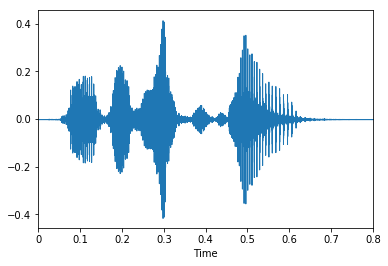

In [3]:
x, sr = librosa.load('./voice_train.wav')
librosa.display.waveplot(x, sr=sr)

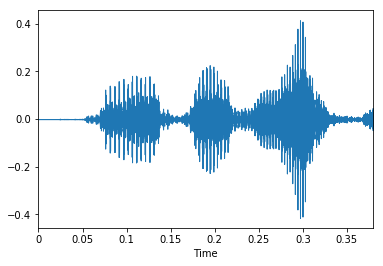

In [4]:
x, sr = librosa.load('./voice_train_cut.wav')
librosa.display.waveplot(x, sr=sr)

In [5]:
inputs, targets = make_batch('./voice_train_cut.wav')
# output_path = './output.wav'
num_time_samples = inputs.shape[1]
num_channels = 1
gpu_fraction = 1
# sample_rate = 44100
sample_rate = 32000

In [6]:
inputs.shape

(1, 16757, 1)

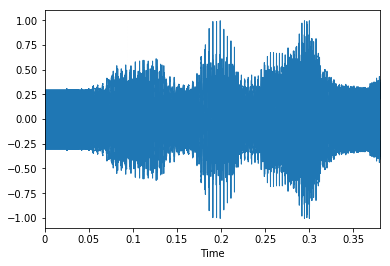

In [7]:
librosa.display.waveplot(inputs[0, :, 0], sr=44100)

In [8]:
model = WaveNet(num_time_samples=num_time_samples, num_channels=num_channels, gpu_fraction=gpu_fraction)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.


In [9]:
# model = WaveNet(num_time_samples=num_time_samples, num_channels=num_channels, gpu_fraction=gpu_fraction)

# print('inputs.shape = ', inputs.shape)
# Audio(inputs.reshape(inputs.shape[1]), rate=44100)
# print('inputs.shape = ', inputs.shape)
# print('targets.shape = ', targets.shape)

tic = time()
model.test(inputs, targets)
toc = time()
print('Training time = {} seconds'.format(toc-tic))

generator = Generator(model)

input_ = inputs[:, 0:1, 0]

tic = time()
predictions = generator.run(input_, sample_rate)


Instructions for updating:
Use standard file APIs to check for files with this prefix.


ValueError: The passed save_path is not a valid checkpoint: ./bongsang_model.ckpt

In [10]:
Audio(predictions, rate=44100)

NameError: name 'predictions' is not defined

In [ ]:
librosa.display.waveplot(predictions[0, :], sr=44100)

In [ ]:
librosa.display.waveplot(predictions[0, :], sr=sample_rate)

In [ ]:
X = librosa.stft(predictions[0, :])
Xdb = librosa.amplitude_to_db(abs(X))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis='hz')